In [41]:
import tarfile
import os
import shutil
import glob
import numpy as np

In [42]:
os.getcwd()

'/content'

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

def test_network(net,trainloader):
    criterion=nn.MSELoss()
    optm=optim.Adam(net.parameters(),lr=0.001)

    data_iter=iter(trainloader)
    images,labels=dataiter.next()

    inputs=Variable(images)
    targets=Variable(images)
    output=net.forward(inputs)
    loss=criterion(output,targets)

    optm.zero_grad()
    loss.backward()
    optm.step()
    
    return True

def imshow(image,ax=None,title=None,normalize=True):
    if ax is None:
        fig,ax=plt.subplots()
    image=image.numpy().transpose((1,2,0))

    if normalize:
        mean=np.array([0.485,0.456,0.406])
        std=np.array([0.229,0.224,0.225])
        image=std*image+mean
        image=np.clip(image,0,1)

    ax.imshow(image)
    ax.spines['top'].set_visible=False
    ax.spines['right'].set_visible=False
    ax.spines['left'].set_visible=False
    ax.spines['bottom'].set_visible=False
    ax.tick_params(axis='both',length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


In [44]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2021-02-03 12:09:00--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar.1’

images.tar.1        100%[===================>] 756.82M  39.4MB/s    in 23s     

2021-02-03 12:09:23 (33.3 MB/s) - ‘images.tar.1’ saved [793579520/793579520]



In [45]:
TARGET_PATH='Images'
if os.path.exists(TARGET_PATH):
    shutil.rmtree(TARGET_PATH)
fname='images.tar'
tar=tarfile.open(fname,'r:tar')
tar.extractall()
tar.close()

In [46]:
len(os.listdir(TARGET_PATH))

120

In [47]:
for dir_name in os.listdir(TARGET_PATH):
    breed_name=dir_name.split('-')[-1].lower()
    source_dir=os.path.join(TARGET_PATH,dir_name)
    target_dir=os.path.join(TARGET_PATH,breed_name)
    shutil.move(source_dir,target_dir)

In [48]:
dataset=[]
for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg',recursive=True):
    breed_name=filepath.split('/')[1] # 상대경로로 filepath에 들어있어서 강아지 이름만 가져오기
    dataset.append([filepath,breed_name])
dataset=np.array(dataset)

In [49]:
dataset

array([['Images/boxer/n02108089_4681.jpg', 'boxer'],
       ['Images/boxer/n02108089_78.jpg', 'boxer'],
       ['Images/boxer/n02108089_4440.jpg', 'boxer'],
       ...,
       ['Images/dhole/n02115913_1047.jpg', 'dhole'],
       ['Images/dhole/n02115913_1224.jpg', 'dhole'],
       ['Images/dhole/n02115913_1060.jpg', 'dhole']], dtype='<U74')

In [50]:
from sklearn.model_selection import train_test_split

train_image,test_image,train_target,test_target=train_test_split(dataset[:,0],dataset[:,1],stratify=dataset[:,1]) # train,test data 비율 비슷하게

In [51]:
train_image.shape, test_image.shape

((15435,), (5145,))

In [52]:
import pandas as pd

pd.Series(train_target).value_counts()/len(train_target)

coated_retriever        0.014707
maltese_dog             0.012245
afghan_hound            0.011597
scottish_deerhound      0.011273
bernese_mountain_dog    0.010625
                          ...   
dhole                   0.007256
clumber                 0.007256
malinois                0.007256
border_collie           0.007256
redbone                 0.007191
Length: 119, dtype: float64

In [53]:
pd.Series(test_target).value_counts()/len(test_target)

coated_retriever          0.014772
maltese_dog               0.012245
afghan_hound              0.011662
scottish_deerhound        0.011273
irish_wolfhound           0.010690
                            ...   
redbone                   0.007191
doberman                  0.007191
irish_water_spaniel       0.007191
affenpinscher             0.007191
welsh_springer_spaniel    0.007191
Length: 119, dtype: float64

In [54]:
DATA_PATH='dataset'
if os.path.exists(DATA_PATH):
    shutil.rmtree(DATA_PATH)
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    os.makedirs(os.path.join(DATA_PATH,'train'))
    os.makedirs(os.path.join(DATA_PATH,'test'))

    for breed_name in set(test_target):
        os.makedirs(os.path.join(DATA_PATH,'train',breed_name))
        os.makedirs(os.path.join(DATA_PATH,'test',breed_name))

In [55]:
# 이미지 파일 복사
import shutil
for filepath, taregt_dir in zip(train_image.tolist(), train_target.tolist()):        
    filename = filepath.split("/")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, "train", taregt_dir, filename)
    shutil.copy(source_path, target_dir) 
    
for filepath, taregt_dir in zip(test_image.tolist(), test_target.tolist()):        
    filename = filepath.split("/")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, "test", taregt_dir, filename)
    shutil.copy(source_path, target_dir)

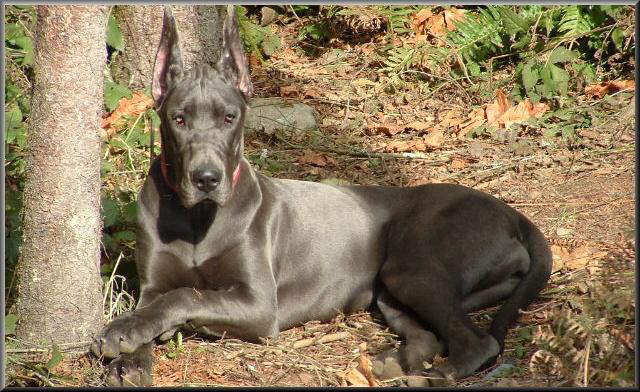

In [56]:
from PIL import Image
 
im = Image.open(target_dir)
im

['tan_coonhound' 'boxer' 'groenendael' 'maltese_dog' 'lakeland_terrier'
 'chow' 'kuvasz' 'welsh_springer_spaniel' 'lhasa' 'chow']


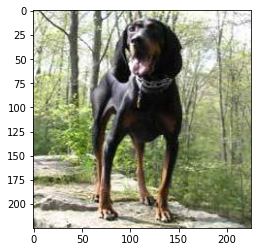

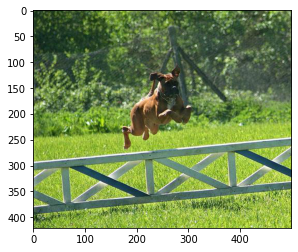

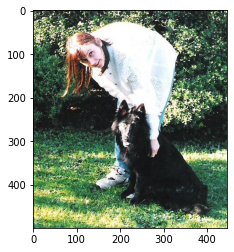

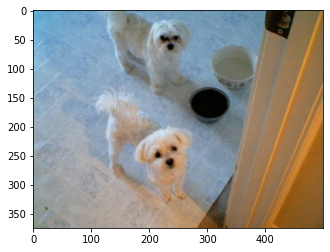

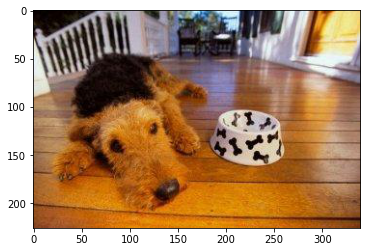

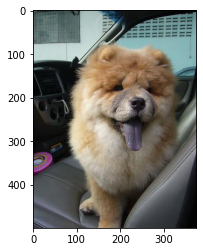

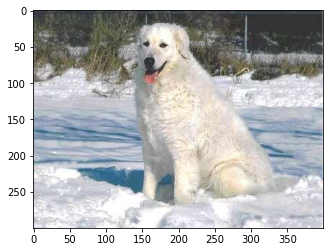

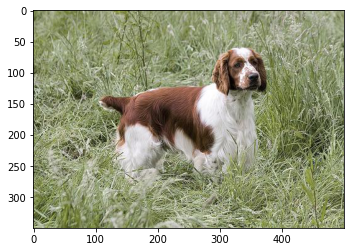

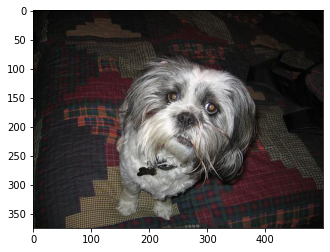

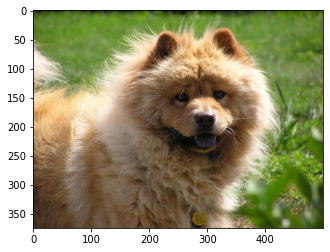

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

    
idx = np.random.choice(len(dataset), 10)

images = dataset[:, 0][idx]

for file in images:
    process(file)
    
print(dataset[:, 1][idx])

In [58]:
from torchvision import datasets, transforms, models

# robust model 만들기 위한 data augmentation
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

DATASET_PATH = "dataset"
train_data = datasets.ImageFolder(DATASET_PATH + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=test_transforms)

In [59]:
import torch
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

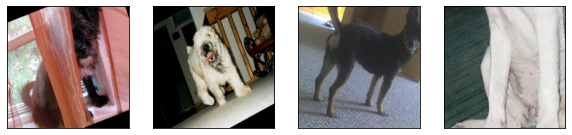

In [60]:
data_iter = iter(test_loader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=True)